# Section 2: Vanilla Neural Networks

From this point onward, we will only deal with Neural Networks. In this section, let's try to develop simple neural networks (vanilla neural networks). Basically neural networks can be considered as universal function approximators. So, in this section, we will develop arbitrarily complicated functions going beyond simple linear and logistic functions, which we have done in the last section.

Following examples are covered during this section

    1) Regression with Neural Networks

    2) Classification (2 Classes) with Neural Networks

    3) Classification (Multi Classes) with Neural Networks

<hr>
<hr>
<hr>

In [2]:
'''first, let's import libraries '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

## 1) Regression with Nural Networks

Again here, we will use diabetes dataset from sklearn library

In [3]:
xx,yy = datasets.load_diabetes(return_X_y=True)

print(xx.shape)
print(yy.shape)

(442, 10)
(442,)


So, we have data for 442 patients, 10 input variables and 1 output variable. And from now on, we will use a library call Tensorflow (Keras: high level, easy to use part of the Tensorflow library) which has lots of functions related to Neural Networks.

In the previous section, we used predefined equations (linear and logistic) to model the data. In case of Neural Networks, we can model arbitrarily complicated function as we prefer, with multiple layers, with multiple neurons in each layer, so on. So theoretically neural networks can be used to approximate any function with large enough number of neurons. There is a mathematical theorem proving this, and it is known as The Universal Approximation Theorem.

__Past researches show that, deeper the neural network, it works better. And this is the key idea in Deep Learning.__

*This is a nice interactive tool to visualize how vanilla neural networks work and play around with different configuration: https://playground.tensorflow.org/*

So let's define our first neural network. There is no any rules here. We can try with different neural network architectures to find the best neural network architecture for our task.

Before that, we have to discuss little about activation functions. If we dig little deeper in to neural network architecture, each neuron can be considered as linear model. But the problem is, when we combine multiple neurons linearly, linear combinations of linear equations are also a linear function. So we are not adding any additional complexity to the model. To go around that, we are introducing activation functions (non-linearity) for each neurons. Most common and simplest activation function in known as ReLU (Rectified Linear Unit). More details about activation functions can be seen here https://en.wikipedia.org/wiki/Activation_function

Examples of commonly used activation functions:

<img src="./graphics/activation-functions.PNG" width="40%"/>
<sub>Source of the figure: https://towardsdatascience.com/complete-guide-of-activation-functions-34076e95d044</sub>

In [4]:
'''define neural network architecture'''

model = Sequential() # initiate the model

# add 4 layers. And we have to define input dimension in the first layer. That's how library is designed.
model.add(Dense(6, input_dim=10, activation='relu')) # 6 neurons in this layer
model.add(Dense(6, activation='relu')) # 6 neurons in this layer
model.add(Dense(6, activation='relu')) # 6 neurons in this layer
model.add(Dense(1, activation='relu')) # 1 neuron in this layer - corresponding to single output variable

model.compile(loss='mean_squared_error', optimizer='adam') # define loss function and optimizer

Now we know from Section 1, best model is the model that produces least error / loss. So in this case additionally to defining arbitrary network, we can define which loss function to be minimized in order to produce the best model. For now, let's select simple loss function like mean squared error. So now the goal is to find optimum parameters of the model that minimizes the loss (mean squared error). The method / strategy of finding optimum parameter is called optimizer. In this case, we have chosen optimizer call __*Adam*__ which is a commonly used optimizer in practice. There are many optimizers available in Tensorflow library (have a look Tensorflow documentation for more details).

Now we have defined neural network architecture, loss function to evaluate the model, and an optimizer that adjust parameters of the model. Then, let's feed the data into neural network and find the best neural network model that fit the data.

Before that, we have to do one more thing. In reality, we will not use the model on the data that we have trained the model. Most likely, we will predict on new data sets which model has never seen during the training process. So, it's better to train the model with one part of the dataset (typically 66%) and evaluate the model on another part of the dataset (typically 33%). These 2 parts of the whole dataset are called as Training and Test (or Validation) dataset. So let's do training and test splitting first and feed these data in to the model for fitting.

In [5]:
'''splitting training and test set'''

split_pnt = int(442 * 0.66) # consider 2/3 as the split point. 66.66 % for training set, and 0.33 % for test set.

xx_train = xx[:split_pnt,:]
yy_train = yy[:split_pnt]

xx_test = xx[split_pnt:,:]
yy_test = yy[split_pnt:]

Next, let's find best model that fits data well. We can use __*fit*__ function here and definitions of input parameters are as follows,

- first 2 parameters - training __*xx*__ data __*yy*__ data
- validation_data - test __*xx*__ and __*yy*__ data as a tuple
- epochs - number of times model will go through entire dataset minimizing loss
- batch_size - while model going through whole dataset to adjust weights that minimize the loss. Model will consider only this amount of data at a time to adjust model parameters. If this value is too large and memory is limited, there will be some errors related to memory. In such cases, better to select smaller batch size.

There are more option available with the __*fit*__ function. For more information, please check Tensorflow (Keras) documentation.

In [6]:
'''fitting model'''

history = model.fit(xx_train, yy_train, validation_data=(xx_test, yy_test), epochs=100, batch_size=10)

Train on 291 samples, validate on 151 samples
Epoch 1/100
291/291 [==============================] - 6s 20ms/step - loss: 28591.1353 - val_loss: 29967.2212
Epoch 2/100
291/291 [==============================] - 0s 398us/step - loss: 28558.8167 - val_loss: 29923.9343
Epoch 3/100
291/291 [==============================] - 0s 341us/step - loss: 28509.6015 - val_loss: 29861.5132
Epoch 4/100
291/291 [==============================] - 0s 356us/step - loss: 28438.0241 - val_loss: 29770.5795
Epoch 5/100
291/291 [==============================] - 0s 354us/step - loss: 28330.6235 - val_loss: 29633.3791
Epoch 6/100
291/291 [==============================] - 0s 348us/step - loss: 28171.6211 - val_loss: 29432.0156
Epoch 7/100
291/291 [==============================] - 0s 365us/step - loss: 27949.4786 - val_loss: 29157.1276
Epoch 8/100
291/291 [==============================] - 0s 364us/step - loss: 27631.3808 - val_loss: 28751.0756
Epoch 9/100
291/291 [==============================] - 0s 360us/ste

Epoch 75/100
291/291 [==============================] - 0s 346us/step - loss: 3449.2344 - val_loss: 3013.8851
Epoch 76/100
291/291 [==============================] - 0s 353us/step - loss: 3434.6463 - val_loss: 3004.7288
Epoch 77/100
291/291 [==============================] - 0s 356us/step - loss: 3427.2977 - val_loss: 2995.3936
Epoch 78/100
291/291 [==============================] - 0s 355us/step - loss: 3420.6071 - val_loss: 2985.2802
Epoch 79/100
291/291 [==============================] - 0s 343us/step - loss: 3402.3273 - val_loss: 2981.4637
Epoch 80/100
291/291 [==============================] - 0s 349us/step - loss: 3404.4473 - val_loss: 2976.8409
Epoch 81/100
291/291 [==============================] - 0s 339us/step - loss: 3392.6393 - val_loss: 2964.5227
Epoch 82/100
291/291 [==============================] - 0s 354us/step - loss: 3387.5112 - val_loss: 2953.3245
Epoch 83/100
291/291 [==============================] - 0s 337us/step - loss: 3371.8431 - val_loss: 2946.0892
Epoch 84/1

With execution of __*fit*__ function, we can see the loss for training dataset (__*loss*__) and loss for test dataset (__*val_loss*__) for each epoch. And losses corresponding to each epoch is saved in to __*history*__ variable in above example. Now we can plot the loss curves of training and test parts of the dataset as below,

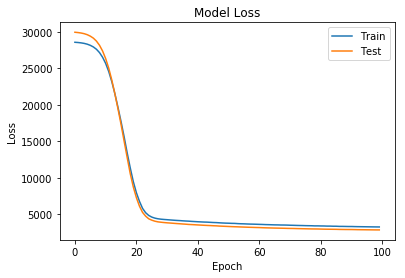

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

This curve is a very important curve to figure out what is the optimum number of epoch that we need to run. Here we are encountering 2 new important concepts in deep learning called over-fitting and under-fitting. Briefly,

    - Over-fitting - when loss of test dataset started to increate after some number of epochs while loss of training dataset is still decreasing. This means model is not generalizing and training need to be stopped before overfitting.
    
    - Under-fitting - model stops while both loss of test and training dataset are still going down. That means training process is stopped pre-maturely and model need to be trained more.
    
Example over-fitting loss curve of test dataset:
<img src="./graphics/overfitting.png" width="66%"/>

There are lots of important statistical theories about over-fitting and under-fitting which are worth exploring more. But in summary, we should avoid over-fitting and under-fitting during training process in order to achieve optimum level of training.

Finally, we can use trained model for prediction. To evaluate the model, it's always better to use test dataset because model has never seen the data in the test dataset during the training process. So evaluation on test dataset indicates how model will perform when model encounters new data.

In [8]:
'''Prediction over the test dataset'''
pred_test = model.predict(xx_test)

#let's compare sample predicted and actual y values 
print('Predicted: '+str(pred_test[12][0])+', Actual: '+str(yy_test[12]))

Predicted: 208.96169, Actual: 236.0


*Exercise: Calculate RMSE Loss over the test dataset*

Like in this example, many neural networks applications have similar patterns, in summary what often we have to do is,

    1) Read and pre-process data
    2) Split dataset in to training and test datasets (randomly)
    3) Define the model, loss function and optimizer
    4) Fit, validate and prediction

Even though, just simple intuitive explanation are given here. There are lots of interesting mathematics going on under the hood. If you are interested, dig deep in to mathematics behind optimizers, neural network architectures, over-fitting / under-fitting, etc.

## 2) Classification (2 Classes) with Neural Networks

In the last example, we have used neural network to estimate blood sugar level which is a continuous variable. That problem is referred as the regression problem. And now, we will move in to the classification problem. In the classification problem, we have to classify input variable in to a class. Let's start with clarification problem of 2 classes.

Here we will use "Breast Cancer Wisconsin (Diagnostic)" Data Set from sklearn library

In [9]:
xx,yy = datasets.load_breast_cancer(return_X_y=True)

print(xx.shape)
print(yy.shape)

print('Class values in yy:' + str(np.unique(yy)))

(569, 30)
(569,)
Class values in yy:[0 1]


This dataset includes 569 data points, 30 input variables, and a single output variable representing weather breast cancer present or not (value 0 or 1).

As before, first let's divide training and test datasets.

In [10]:
'''splitting training and test set'''

split_pnt = int(569 * 0.66) # consider 2/3 as the split point. 66.66 % for training set, and 0.33 % for test set.

xx_train = xx[:split_pnt,:]
yy_train = yy[:split_pnt]

xx_test = xx[split_pnt:,:]
yy_test = yy[split_pnt:]

Second, let’s define neural network. 

The main different here is use of __*sigmoid*__ activation at the last layer of the neural network. Since we are performing 2 class classification problem here, output should be either value 0 or 1. So, it's appropriate to use an activation function that scales output values between 0 and 1. Hence __*sigmoid*__ is the ideal function for 2 class classification problem.

In [11]:
'''define neural network architecture'''

model = Sequential()

model.add(Dense(6, input_dim=30, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

Finally let's fit, plot the loss curves and validate the model.

In [12]:
history = model.fit(xx_train, yy_train, validation_data=(xx_test, yy_test), epochs=100, batch_size=10)

Train on 375 samples, validate on 194 samples
Epoch 1/100
375/375 [==============================] - 0s 1ms/step - loss: 0.5086 - val_loss: 0.1566
Epoch 2/100
375/375 [==============================] - 0s 366us/step - loss: 0.1233 - val_loss: 0.0857
Epoch 3/100
375/375 [==============================] - 0s 352us/step - loss: 0.1227 - val_loss: 0.0943
Epoch 4/100
375/375 [==============================] - 0s 361us/step - loss: 0.0881 - val_loss: 0.1123
Epoch 5/100
375/375 [==============================] - 0s 360us/step - loss: 0.0898 - val_loss: 0.0917
Epoch 6/100
375/375 [==============================] - 0s 356us/step - loss: 0.0918 - val_loss: 0.0821
Epoch 7/100
375/375 [==============================] - 0s 353us/step - loss: 0.0887 - val_loss: 0.0773
Epoch 8/100
375/375 [==============================] - 0s 382us/step - loss: 0.1013 - val_loss: 0.0763
Epoch 9/100
375/375 [==============================] - 0s 353us/step - loss: 0.0924 - val_loss: 0.1410
Epoch 10/100
375/375 [=======

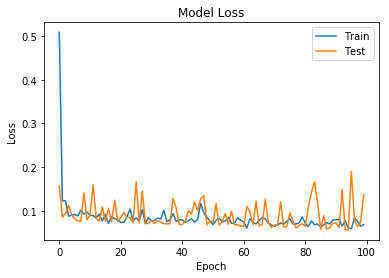

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
'''Prediction over the test dataset'''
pred_test = model.predict(xx_test)

#let's compare sample predicted and actual y values 
print('Predicted: '+str(np.round(pred_test[18][0]))+', Actual: '+str(yy_test[18]))

Predicted: 0.0, Actual: 0


*Exercise: Calculate confusion matrix and total accuracy over the test dataset*

## 3) Classification (Multi Classes) with Neural Networks

Let's move in to a multi-class classification problem. Here, we will use Iris dataset from sklearn library.

In [21]:
xx, yy = datasets.load_iris(return_X_y=True)

print(xx.shape)
print(yy.shape)

print('Class values in yy:' + str(np.unique(yy)))
print('yy values: '+str(yy))

(150, 4)
(150,)
Class values in yy:[0 1 2]
yy values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This dataset includes 150 data points, 4 input variables, and single output variable representing class of data points. There are 3 classes (class 0, class 1 and class 2).

In this example, we can label our classes arbitrarily. We can use any number to indicate any class as we use here (values of 0, 1 and 2). Another problem associated with this numbering is, this numbers infer that in terms of values, these class labels are depended (like __*class 2 value*__ = __*class 1 value*__ times __*2*__, etc.). So these class labels should be independent. To solve this, we use a technique call one-hot encoding.

Tensorflow (Keras) library include function for this. First, let's try it and see what it produces.

In [22]:
'''one-hot encoding'''

from keras.utils import to_categorical

yy_cat = to_categorical(yy)

# let's print shapes and example one-hot encoded value
print('Class label shape: '+str(yy.shape))
print('One-hot encoded shape: '+str(yy_cat.shape))

print('Example - Class label: '+str(yy[10])+', One-hot encoded: '+str(yy_cat[10,:]))
print('Example - Class label: '+str(yy[100])+', One-hot encoded: '+str(yy_cat[100,:]))

Class label shape: (150,)
One-hot encoded shape: (150, 3)
Example - Class label: 0, One-hot encoded: [1. 0. 0.]
Example - Class label: 2, One-hot encoded: [0. 0. 1.]


We can see that in the process of one-hot encoding, vector was created for each __*yy*__ value with the length equivalent to number of classes. And value of the vector become 1 where index of the vector equals to class label leaving remaining values are as zeros. This process allow us to create interdependent class labels. If you are familiar with Linear Algebra, this is like independent basis for R^3 vector space. In summary, we use one-hot encoding to make class independent labels and this is very useful when it comes to multi-class classification problem.

As before, now let's divide training and test datasets. But there is another issue here. If we look at the __*yy*__ values, they are like already sorted. So if we divide this data in to training and test set, first part which consisted of only __*class 1*__ and __*class 2*__ will be in the training set, and latter part (only __*class 3*__) will be in the test set. This is not representative of the whole dataset. So before we split the dataset in to training and test set, we have to randomize the dataset. For this process, we can use an in-built function with shuffle option in sklearn library.

In [26]:
from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy_cat, test_size=0.33, shuffle=True)

# print shapes to make sure the split
print(xx_train.shape)
print(xx_test.shape)
print(yy_train.shape)
print(yy_test.shape)

(100, 4)
(50, 4)
(100, 3)
(50, 3)


Finally let's define the model, fit, plot the loss curves and validate the model.

In [27]:
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

One unique thing is use of __*softmax*__ as the activation function in the last layer. This works well with classification problems. Simply, it converts output values in to probabilities, brining output values to be compatible with one-hot encoded __*yy*__ values which varied between 0 and 1. Short description about __*softmax*__ activation can be seen in this nice short video.(https://www.youtube.com/watch?v=G8eNWzxOgqE)

Other unique thing in this model is use of "categorical cross-entropy" as the loss function instead of "mean squared error". Experiments shows that "categorical cross-entropy" works well with the classification problem. Nice explanation about cross-entropy loss function can be seen here in this short video (https://www.youtube.com/watch?v=tRsSi_sqXjI). And even with the "mean squared error" function, model will work.

In [28]:
history = model.fit(xx_train, yy_train, validation_data=(xx_test, yy_test), epochs=100, batch_size=10)

Train on 100 samples, validate on 50 samples
Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.0323 - val_loss: 1.0021
Epoch 2/100
100/100 [==============================] - 0s 558us/step - loss: 0.9206 - val_loss: 0.8595
Epoch 3/100
100/100 [==============================] - 0s 528us/step - loss: 0.8291 - val_loss: 0.7491
Epoch 4/100
100/100 [==============================] - 0s 479us/step - loss: 0.7545 - val_loss: 0.6405
Epoch 5/100
100/100 [==============================] - 0s 489us/step - loss: 0.6770 - val_loss: 0.5651
Epoch 6/100
100/100 [==============================] - 0s 489us/step - loss: 0.5973 - val_loss: 0.4772
Epoch 7/100
100/100 [==============================] - 0s 494us/step - loss: 0.5373 - val_loss: 0.4142
Epoch 8/100
100/100 [==============================] - 0s 494us/step - loss: 0.4864 - val_loss: 0.3685
Epoch 9/100
100/100 [==============================] - 0s 489us/step - loss: 0.4437 - val_loss: 0.3366
Epoch 10/100
100/100 [========

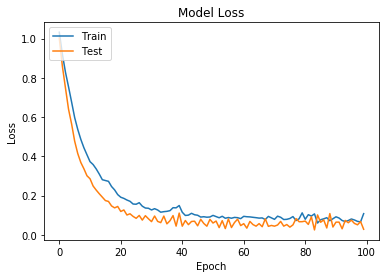

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
'''Prediction over the test dataset'''
pred_test = model.predict(xx_test)

#let's compare sample predicted and actual y values 
print('Predicted: '+str(np.round(pred_test[12]))+', Actual: '+str(yy_test[12]))

Predicted: [1. 0. 0.], Actual: [1. 0. 0.]
